<a href="https://www.kaggle.com/code/easyice/auto-prices-eda-and-lr-model?scriptVersionId=239039297" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/auto-prices-and-economic-trends-20192023/automobile_prices_economics_2019_2023.csv


## Load Dataset.

In [2]:
df = pd.read_csv("/kaggle/input/auto-prices-and-economic-trends-20192023/automobile_prices_economics_2019_2023.csv")
df.head()

,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
0,19-Jan,"25,000","18,000",1.60%,2.40%,"28,500"
1,19-Feb,"25,000","17,900",1.50%,2.40%,"29,000"
2,19-Mar,"25,000","17,800",1.90%,2.40%,"31,500"
3,19-Apr,"25,000","17,700",2.00%,2.40%,"30,000"
4,19-May,"25,000","17,600",1.80%,2.40%,"32,000"


# E.D.A.

## Basic Summary.

In [3]:
df.size

366

In [4]:
df.ndim

2

In [5]:
df.shape

(61, 6)

In [6]:
df.columns

Index(['Month/Year', 'New Price ($)', 'Used Price ($)', 'Inflation Rate (%)',
       'Interest Rate (%)', 'Units Sold'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month/Year          60 non-null     object
 1   New Price ($)       60 non-null     object
 2   Used Price ($)      60 non-null     object
 3   Inflation Rate (%)  60 non-null     object
 4   Interest Rate (%)   60 non-null     object
 5   Units Sold          60 non-null     object
dtypes: object(6)
memory usage: 3.0+ KB


In [8]:
df.isnull().sum()

Month/Year            1
New Price ($)         1
Used Price ($)        1
Inflation Rate (%)    1
Interest Rate (%)     1
Units Sold            1
dtype: int64

## Data Preprocessing.

In [9]:
df['Month/Year'] = pd.to_datetime(df['Month/Year'], format='%y-%b')
df['New Price ($)'] = df['New Price ($)'].str.replace(',','').astype('float32')
df['Used Price ($)'] = df['Used Price ($)'].str.replace(',','').astype('float32')
df['Inflation Rate (%)'] = df['Inflation Rate (%)'].str.replace('%','').astype('float32')
df['Interest Rate (%)'] = df['Interest Rate (%)'].str.replace('%','').astype('float32')
df['Units Sold'] = df['Units Sold'].str.replace(',','').astype('float32')

In [10]:
df.head()

,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
0,2019-01-01,25000.0,18000.0,1.6,2.4,28500.0
1,2019-02-01,25000.0,17900.0,1.5,2.4,29000.0
2,2019-03-01,25000.0,17800.0,1.9,2.4,31500.0
3,2019-04-01,25000.0,17700.0,2.0,2.4,30000.0
4,2019-05-01,25000.0,17600.0,1.8,2.4,32000.0


In [11]:
# Handling Null Values.
df.isnull().sum()

Month/Year            1
New Price ($)         1
Used Price ($)        1
Inflation Rate (%)    1
Interest Rate (%)     1
Units Sold            1
dtype: int64

In [12]:
# we already have 60 valid entries which are required for dataset from(jan-2019 to dec-2023).
# last row which has null values is not required we will drop that complete row.
df.drop(60, axis=0, inplace=True)
df

,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
0,2019-01-01,25000.0,18000.0,1.6,2.40,28500.0
1,2019-02-01,25000.0,17900.0,1.5,2.40,29000.0
2,2019-03-01,25000.0,17800.0,1.9,2.40,31500.0
3,2019-04-01,25000.0,17700.0,2.0,2.40,30000.0
4,2019-05-01,25000.0,17600.0,1.8,2.40,32000.0
5,2019-06-01,25000.0,17500.0,1.6,2.40,33000.0
6,2019-07-01,25000.0,17400.0,1.8,2.40,34500.0
7,2019-08-01,25000.0,17300.0,1.7,2.40,35000.0
8,2019-09-01,25000.0,17200.0,1.5,2.40,33500.0
9,2019-10-01,25000.0,17100.0,1.8,2.40,31000.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Month/Year          60 non-null     datetime64[ns]
 1   New Price ($)       60 non-null     float32       
 2   Used Price ($)      60 non-null     float32       
 3   Inflation Rate (%)  60 non-null     float32       
 4   Interest Rate (%)   60 non-null     float32       
 5   Units Sold          60 non-null     float32       
dtypes: datetime64[ns](1), float32(5)
memory usage: 1.8 KB


In [14]:
df.describe()

,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
count,60,60.000000,60.000000,60.000000,60.000000,60.00000
mean,2021-06-16 06:24:00,25543.333984,15580.000000,4.125000,2.075833,42700.00000
min,2019-01-01 00:00:00,25000.000000,13800.000000,0.100000,0.250000,18000.00000
25%,2020-03-24 06:00:00,25200.000000,14600.000000,1.675000,0.250000,29375.00000
50%,2021-06-16 00:00:00,25400.000000,15350.000000,4.100000,2.075000,37250.00000
75%,2022-09-08 12:00:00,25700.000000,16525.000000,6.250000,3.125000,55250.00000
max,2023-12-01 00:00:00,27000.000000,18000.000000,9.100000,5.750000,75000.00000
std,NaN,533.732117,1210.658813,2.660867,1.879923,15888.43457


## Visual Analysis.

In [15]:
import warnings
warnings.filterwarnings('ignore')

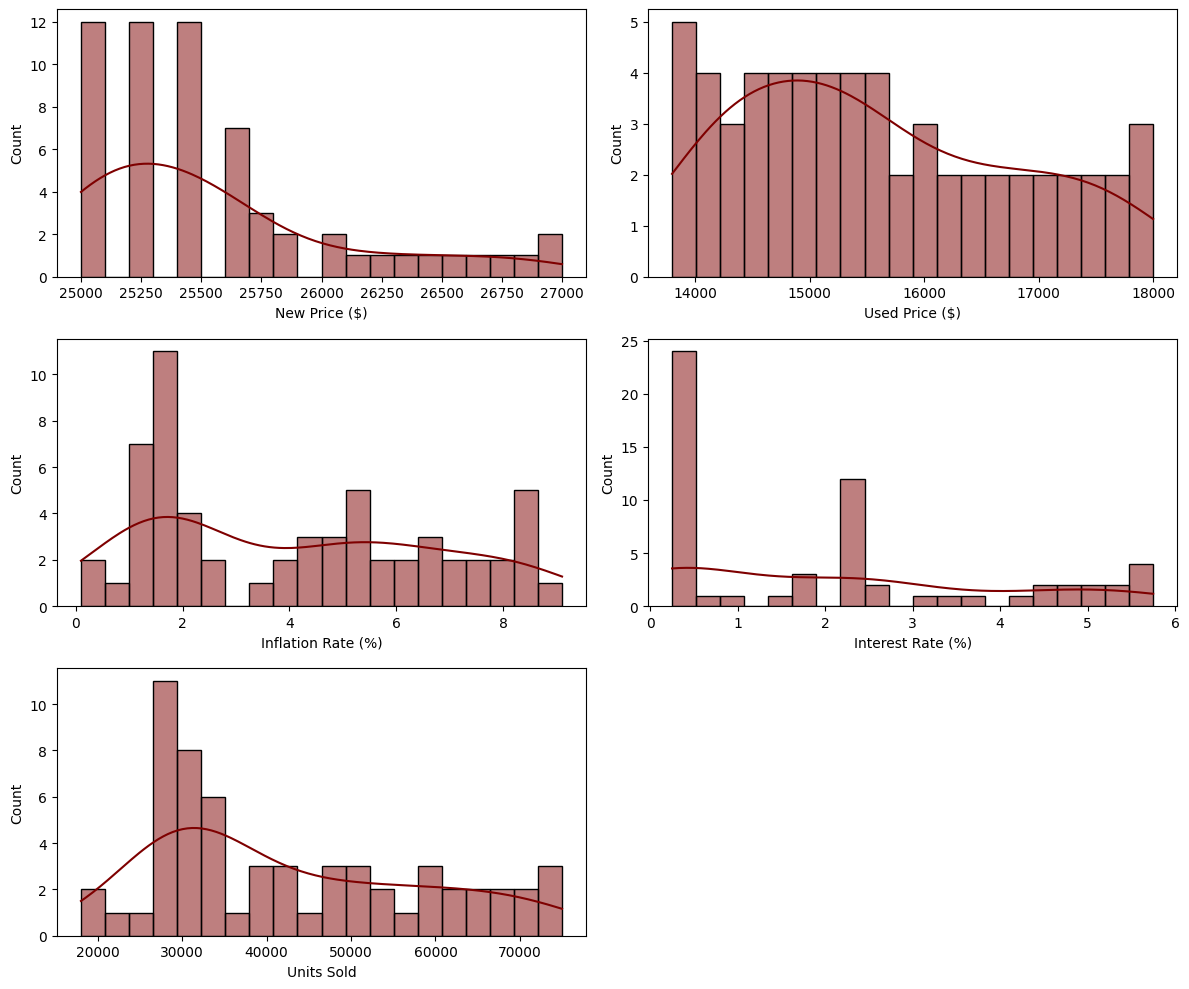

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# univariate.
plt.figure(figsize=(12,10))
plotnumber=1
for column in df.columns[1:]:
    if plotnumber<=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.histplot(df[column], kde=True, color='#7E0000', bins=20)
        plt.xlabel(column)
        plt.ylabel("Count")
    plotnumber+=1
plt.tight_layout()



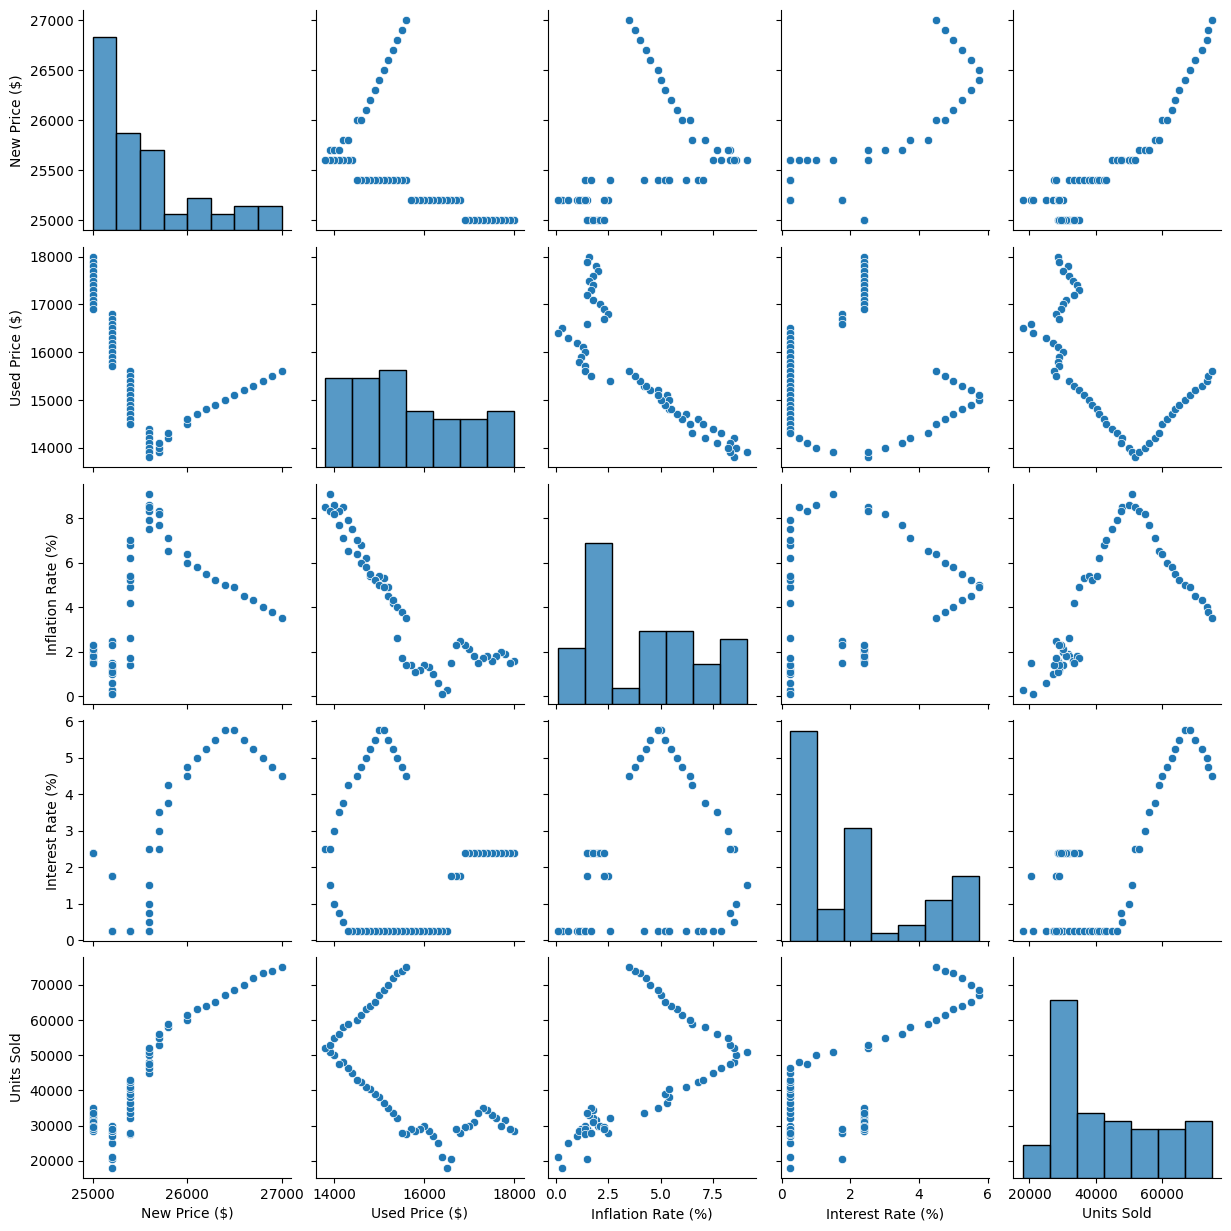

In [17]:
# bivariate analysis.
sns.pairplot(df)

In [18]:
df.head()

,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
0,2019-01-01,25000.0,18000.0,1.6,2.4,28500.0
1,2019-02-01,25000.0,17900.0,1.5,2.4,29000.0
2,2019-03-01,25000.0,17800.0,1.9,2.4,31500.0
3,2019-04-01,25000.0,17700.0,2.0,2.4,30000.0
4,2019-05-01,25000.0,17600.0,1.8,2.4,32000.0


Text(0.5, 1.0, 'Units sold Year wise.')

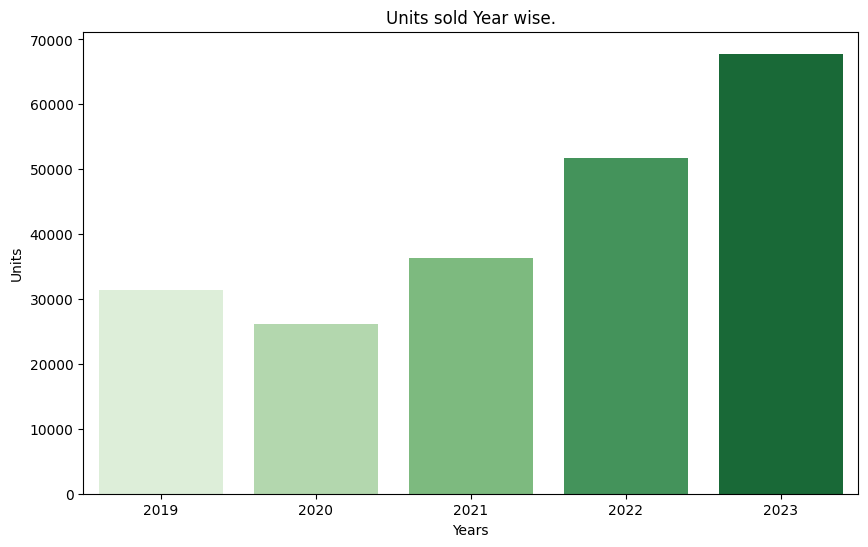

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Month/Year'].dt.year, y='Units Sold', data=df, palette='Greens', ci=None)
plt.xlabel('Years')
plt.ylabel('Units')
plt.title('Units sold Year wise.')

<Axes: xlabel='Month/Year', ylabel='New Price ($)'>

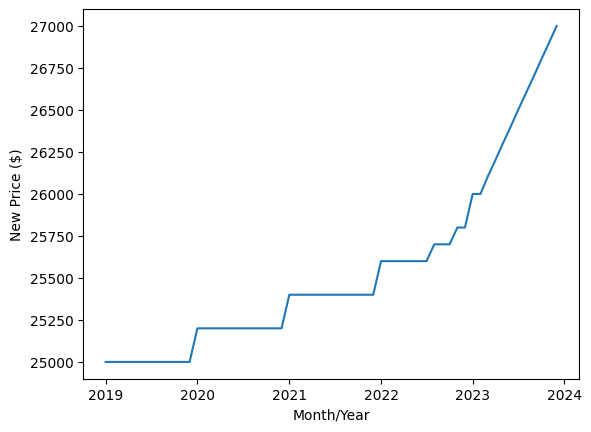

In [20]:
sns.lineplot(x='Month/Year', y='New Price ($)', data=df)

<Axes: xlabel='Month/Year', ylabel='New Price ($)'>

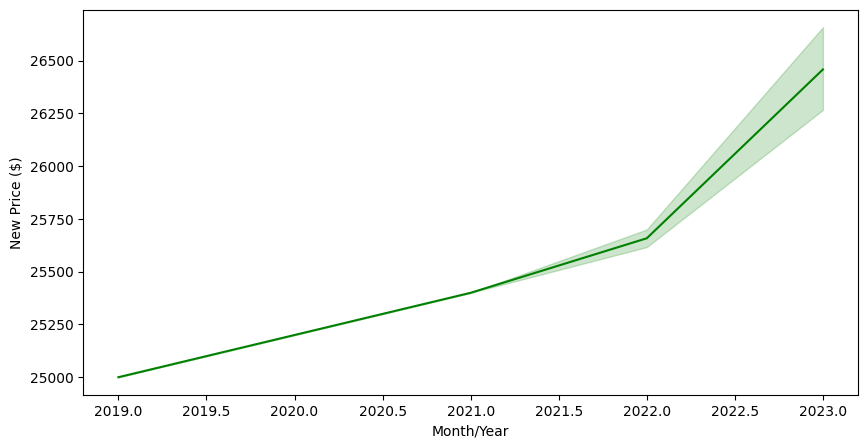

In [21]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['Month/Year'].dt.year, y='New Price ($)', data=df, color='g')

Text(0.5, 0, 'Month')

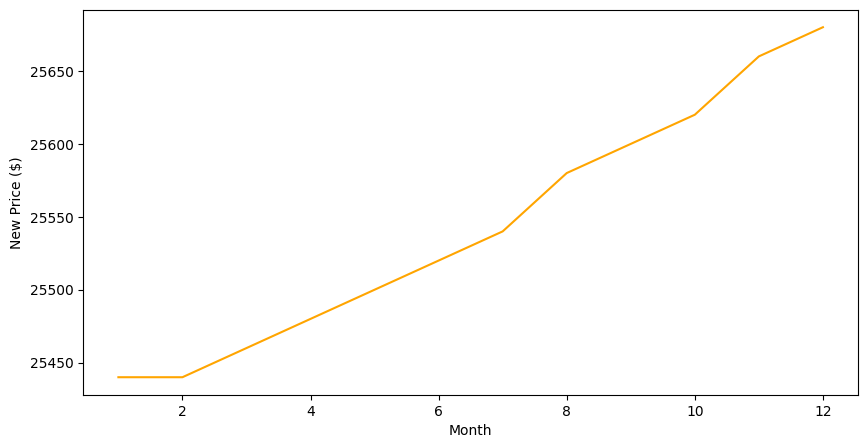

In [22]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['Month/Year'].dt.month, y='New Price ($)', data=df, color='orange', ci=None)
plt.xlabel('Month')

Text(0.5, 1.0, 'Month wise Units Sold')

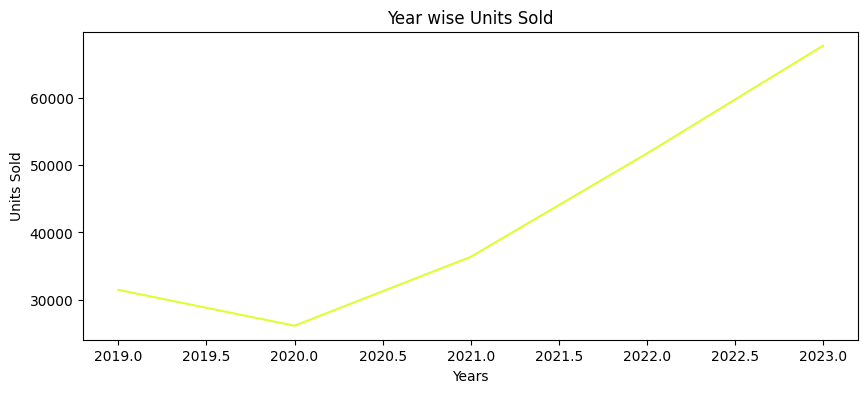

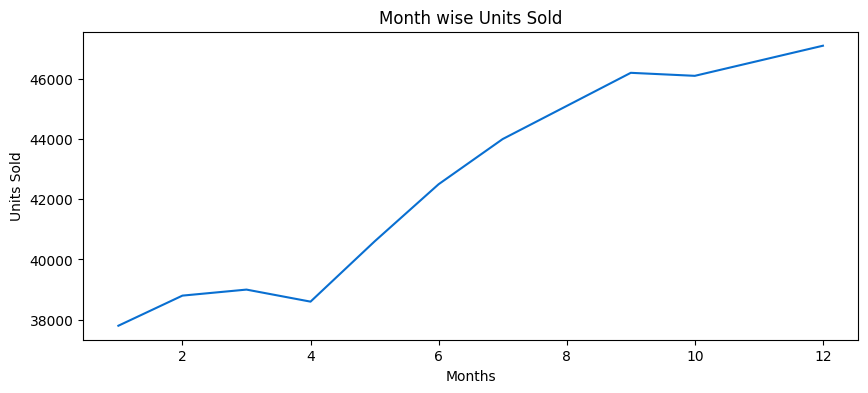

In [23]:
plt.figure(figsize=(10,4))
sns.lineplot(x=df['Month/Year'].dt.year, y='Units Sold', data=df, color='#dbff33', ci=None)
plt.xlabel('Years')
plt.title("Year wise Units Sold")
plt.figure(figsize=(10,4))
sns.lineplot(x=df['Month/Year'].dt.month, y='Units Sold', data=df, color='#096fd1', ci=None)
plt.xlabel('Months')
plt.title("Month wise Units Sold")

Text(0.5, 1.0, 'Inflation Rate vs Interest Rate')

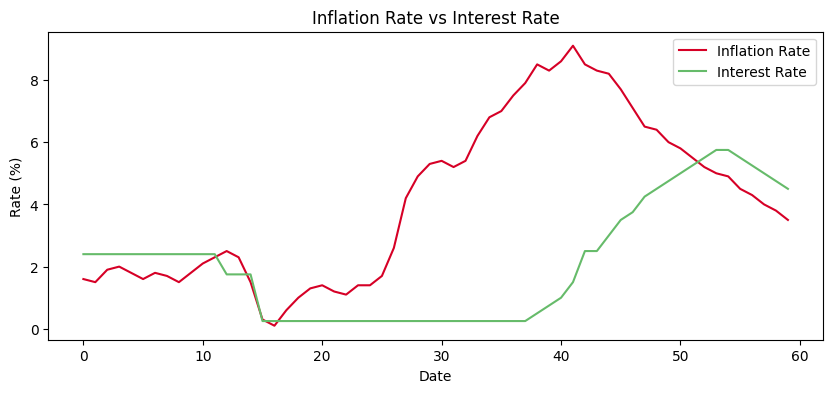

In [24]:
plt.figure(figsize=(10,4))
sns.lineplot(x=df.index, y='Inflation Rate (%)', label='Inflation Rate', data=df, color='#d60026')
sns.lineplot(x=df.index, y='Interest Rate (%)',label='Interest Rate', data=df, color='#66BB6A')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.title("Inflation Rate vs Interest Rate")

Text(0.5, 1.0, 'New vs Used Car Prices')

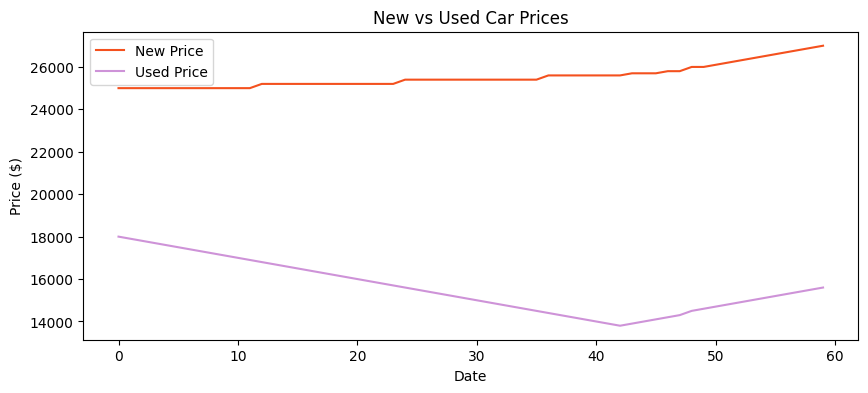

In [25]:
plt.figure(figsize=(10,4))
sns.lineplot(x=df.index, y='New Price ($)', label='New Price', data=df, color='#F4511E')
sns.lineplot(x=df.index, y='Used Price ($)',label='Used Price', data=df, color='#CE93D8')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title("New vs Used Car Prices")

<Axes: >

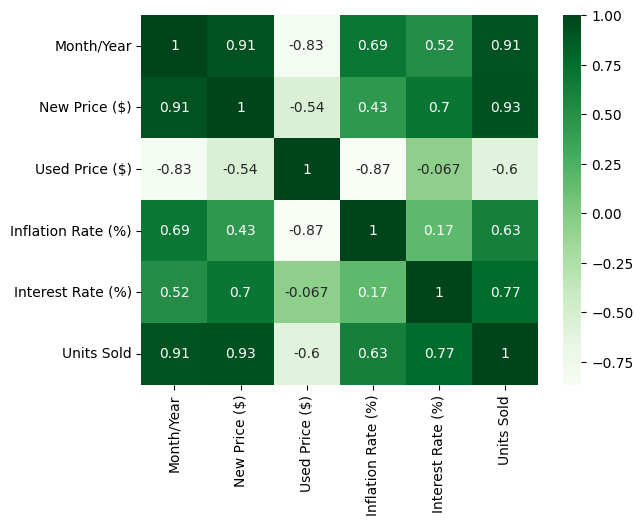

In [26]:
sns.heatmap(df.corr(), annot=True, cmap='Greens')

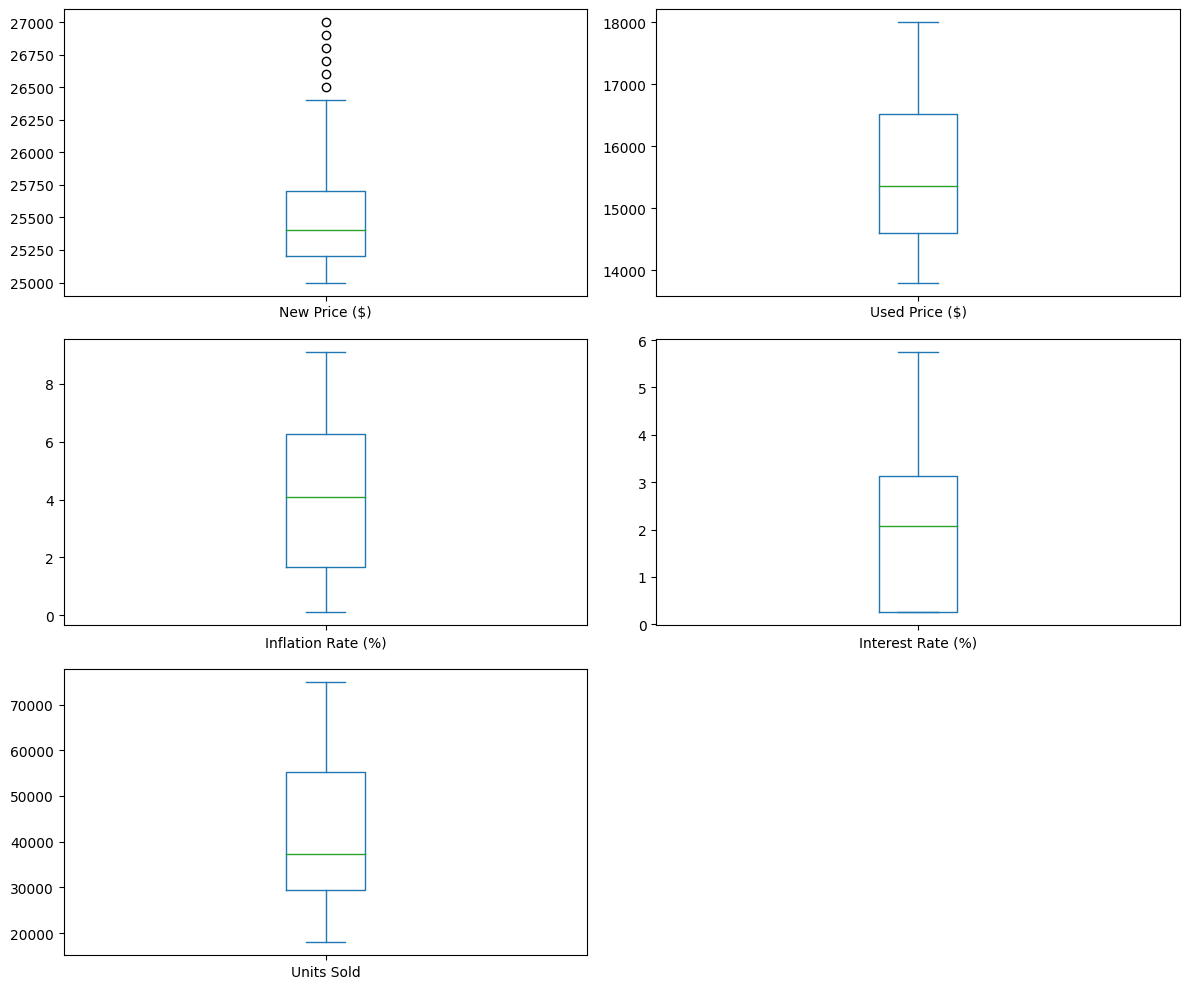

In [27]:
plt.figure(figsize=(12,10))
plotnumber=1
for column in df.columns[1:]:
    if plotnumber<=5:
        ax = plt.subplot(3,2,plotnumber)
        df[column].plot(kind='box')
       
    plotnumber+=1
plt.tight_layout()

# Model Creation.

## Train Test Split.

In [28]:
X = df.drop(columns=['Month/Year','Units Sold'], axis=1)
y = df['Units Sold']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(48, 4)
(48,)
(12, 4)
(12,)


## Scaling Data.

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## LR Model

In [32]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train_scaled,y_train)

LinearRegression()

In [33]:
y_pred = LR.predict(X_test_scaled)
y_pred

array([31072.043, 30464.344, 45731.246, 55665.812, 33054.75 , 70130.22 ,
       39524.797, 60926.145, 33641.684, 71859.375, 56784.227, 62786.156],
      dtype=float32)

In [34]:
y_test

0     28500.0
5     33000.0
36    45000.0
45    56000.0
13    29000.0
54    68500.0
33    41000.0
48    60000.0
12    28000.0
57    73500.0
46    58000.0
50    63000.0
Name: Units Sold, dtype: float32

In [35]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2_score(y_test,y_pred)

0.9762267509972066

In [36]:
print(mean_squared_error(y_test,y_pred))

5989001.5


In [37]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

2447.2437


In [38]:
print(mean_absolute_error(y_test,y_pred))

1914.2812


Text(0.5, 1.0, 'Actual vs Predicted Values')

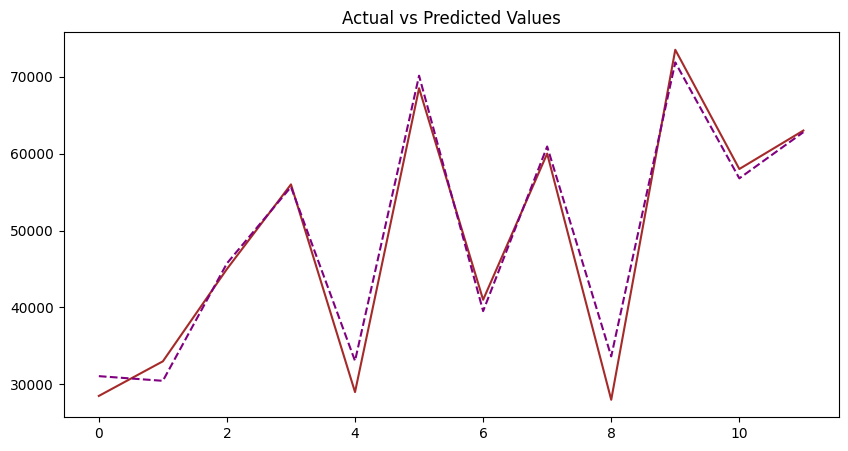

In [39]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, color='brown', label='Actual')
plt.plot(y_pred, color='purple', label='Predicted', linestyle='dashed')
plt.title('Actual vs Predicted Values')